# Wild Turkey Demography

Clarissa Molina


## Abstract

I am studying the landscape genetics of wild turkeys in Texas. One aspect of my project is to analyze the DNA of wild turkeys that have been released onto the east Texas landscape as part of a recent restocking program known as super-stocking. For this course's final project, I aimed to clean up my dataset, perform calculations, and visualize the data through a series of graphs. Several functions were written to achieve these aims. The exernal packages required were Pandas, Numpy, and Matplotlib. Deliverables include: a module containing all created functions, a portion of my dataset, and a Jupyter notebook containing my code and final graphs. Ultimately, the goal of this program was to streamline future data analysis and create more accurate and reliable products over the course of this project. 


## Introduction

Super-stocking involves simultaneously releasing ~80 wild birds of mixed origin at each site. Since 2014, birds from 11 different states have been translocated to east Texas and I aim to determine the genetic contribution of each source to the current population. In order to utilize super-stocking in other areas, we need to know the source that contributes the most productive individuals and the ideal number of states to source birds from in order to successfully establish a population.

I have received a dataset from the Texas Parks & Wildlife Dept that contains information collected from individuals upon release. This dataset needs to undergo substantial preparation for data analysis. The first function I wrote sub-setted the data to only include certain columns. Next, I wrote a function that formatted the columns containing coordinates so that all values were the same length. After data cleanup was complete, I moved on to the manipulation stage. Two functions were created to calculate the percent composition by source state across all counties and then for each county. I then moved on to visualizing the data, creating several pie charts to display the results across all counties and for each county. 

This program automates tasks that would have otherwise been completed one at a time. The dataset could have been re-formatted in Excel but tasks such as unifying the length of all values in a column done by hand. Calculations of percent composition and the generation of pie charts could also be done in Excel but each column would have to be selected and inputted into an equation. This process would have been repeated for each county and again when inserting the pie chart. Not to mention, any pie chart formatting would have had to be done by hand. Writing a python program that automates these tasks is a more efficient use of time and will increase the quality of research products.


## Study Area & Data

Our super-stocking sites reside in seven counties of East Texas and are located within the Post Oak Savannah and Piney Woods ecoregions. This landscape is generally characterized by a mixture of native grasses and trees such as oaks, pine, and black hickory.

The dataset consists of information collected during super-stocking releases such as release county, source state, release site, band #, age, sex, and release date.


## Project Design

My project consists of three phases: Data Cleanup, Data Manipulation, and Data Visualization

Data Cleanup:
There were two objectives completed during this phase: sub-setting the data to display only the desired columns and changing all values of a specified column to be of a uniform length. A function was written to accomplish each objective. The first function takes a positional argument for the object containing the full dataset and a variable length positional argument containing the column names to be included in the subset data. The function outputs an object containing the subset data. The second function takes three positional arguments for the dataset, the column name, and the desired length of the values in that column. The function outputs a new dataset with the adjusted column. 

Data Manipulation: 
For this phase, I wrote two functions.

The first function accomplished three tasks. 

1. Create a list of unique values from a specified column in a dataset. 
2. Construct a for loop to run through each unique value from the previously generated list and count up the amount of times a certain value appeared in the specified column of the dataset, count the total number of values in the column, and calculate the percent contribution of each value to the entire column
3. Create a dataframe from the output of the first two tasks

This function enabled me to loop through each state, calculate that state's contribution to the population, and generate a new dataframe to display these values.

My second function borrowed several aspects from the first function and allowed me to loop through a list of unique county names and create a dataframe displaying each state's contribution to a specific county. These seven dataframes were then added into a dictionary. 

Data Visualization:
The third phase first consists of creating a series of pie charts. The first pie chart displays the population composition by state across all seven counties. I then created a function that looped through each dataframe (created from the second function of the Data Manipulation portion) and generated a pie chart with the demography data for each county. 


## Results & Discussion

### Data Cleanup

In [1]:
import pandas as pd

In [2]:
import turkey_demography as tdem

In [3]:
dir(tdem)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_county',
 'get_each_county',
 'length_format',
 'np',
 'pd',
 'pie_county',
 'plt',
 'subset']

In [4]:
release_data = pd.read_csv("TranslocationMasterOnly.csv")

# View the first 5 rows
release_data.head()

,County,Trap State,Lat,Long,Band #,Age,Sex,Release Date
0,Anderson,Missouri,32.052996,-95.532883,8207.0,A,M,1/23/2014
1,Anderson,Missouri,32.052996,-95.532883,8209.0,J,F,1/23/2014
2,Anderson,Missouri,32.052996,-95.532883,8210.0,J,F,1/24/2014
3,Anderson,Missouri,32.052996,-95.532883,8211.0,J,F,1/23/2014
4,Anderson,Missouri,32.052996,-95.532883,8212.0,J,F,1/23/2014


In [5]:
#call up the subset function to subset the dataframe

subset_data = tdem.subset(release_data, "County", "Trap State",
                     "Lat", "Long", "Release Date")

subset_data.head()

,County,Trap State,Lat,Long,Release Date
0,Anderson,Missouri,32.052996,-95.532883,1/23/2014
1,Anderson,Missouri,32.052996,-95.532883,1/23/2014
2,Anderson,Missouri,32.052996,-95.532883,1/24/2014
3,Anderson,Missouri,32.052996,-95.532883,1/23/2014
4,Anderson,Missouri,32.052996,-95.532883,1/23/2014


In [6]:
#let's call up the length_format function to make the values in the longitude and latitude columns the same length!

new_data = tdem.length_format(subset_data, "Lat", 8)
new_data = tdem.length_format(subset_data, "Long", 8)

new_data.head()

,County,Trap State,Lat,Long,Release Date
0,Anderson,Missouri,32.052996,-95.532883,1/23/2014
1,Anderson,Missouri,32.052996,-95.532883,1/23/2014
2,Anderson,Missouri,32.052996,-95.532883,1/24/2014
3,Anderson,Missouri,32.052996,-95.532883,1/23/2014
4,Anderson,Missouri,32.052996,-95.532883,1/23/2014


### Data Manipulation

In [7]:
#Calculate the percent contribution from each state across all counties

all_counties = tdem.all_county(new_data, "Trap State")

all_counties

,Trap State,Percent Contribution
0,Missouri,7.84
1,Alabama,1.65
2,Tennessee,6.90
3,West Virginia,5.41
4,Texas,61.13
5,Kansas,3.92
6,South Carolina,1.41
7,Iowa,8.70
8,Louisiana,0.86
9,North Carolina,1.96


In [8]:
#Let's make sure all the percent contributions add up to approximately 100
all_counties['Percent Contribution'].sum()

#this works since i rounded the values in the function to two decimals

100.01999999999998

In [9]:
#call up the get_each_county function to output a dictionary of each county's data
every_county = tdem.get_each_county(new_data,"County","Trap State")

every_county

{'Anderson':         Trap State  Percent Contribution
 0         Missouri                  9.45
 1          Alabama                  2.23
 2        Tennessee                  9.79
 3    West Virginia                  3.78
 4            Texas                 53.26
 5           Kansas                  8.59
 6   South Carolina                  1.72
 7             Iowa                  8.93
 8        Louisiana                  1.72
 9   North Carolina                  0.00
 10           Maine                  0.52,
 'Henderson':         Trap State  Percent Contribution
 0         Missouri                 18.92
 1          Alabama                  0.00
 2        Tennessee                  0.00
 3    West Virginia                  1.62
 4            Texas                 47.03
 5           Kansas                  0.00
 6   South Carolina                  0.00
 7             Iowa                 18.92
 8        Louisiana                  0.00
 9   North Carolina                 13.51
 10     

### Data Visualization- Pie Charts

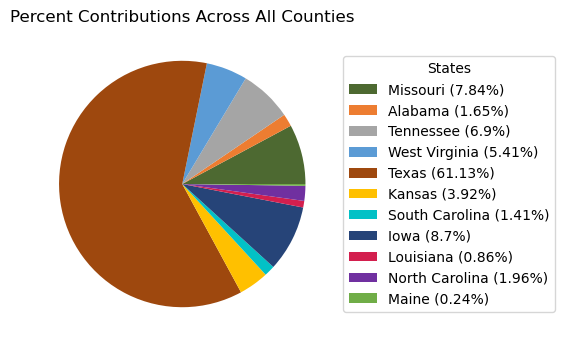

In [10]:
import matplotlib.pyplot as plt
import numpy as np

all_counties['State Cont'] = all_counties['Trap State'] + " (" + all_counties['Percent Contribution'].astype(str) + "%)"

labels = all_counties['State Cont']
sizes = all_counties['Percent Contribution']
colors = ['#4D6931', '#ED7D31', '#A5A5A5','#5B9BD5',
          '#9E480E','#FFC000', '#02C1C6', '#264478',
          '#D31F4E', '#7030A0', '#70AD47']

fig, ax = plt.subplots(figsize=(7, 4),
                       subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, colors = colors)

ax.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Percent Contributions Across All Counties")

plt.show()

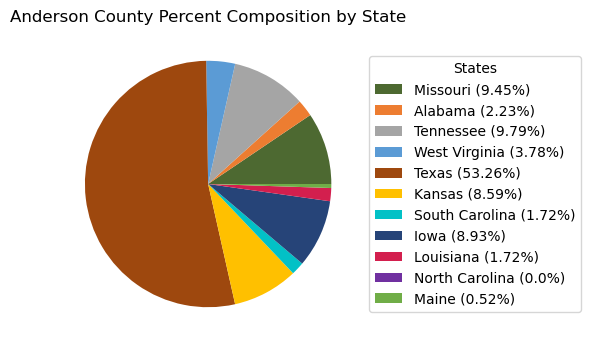

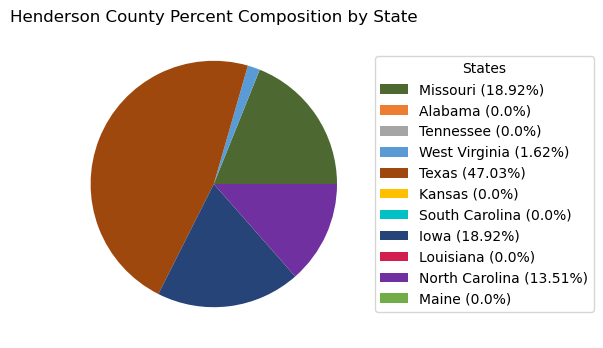

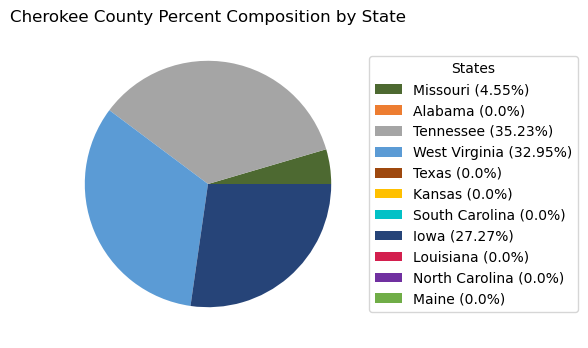

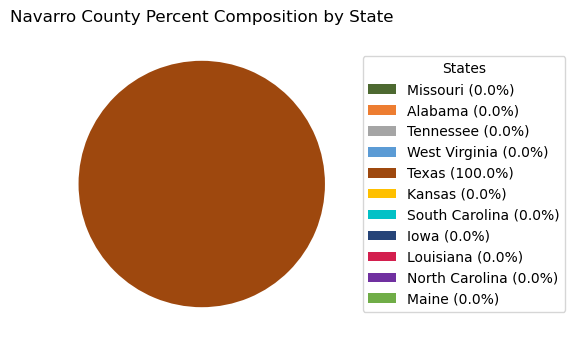

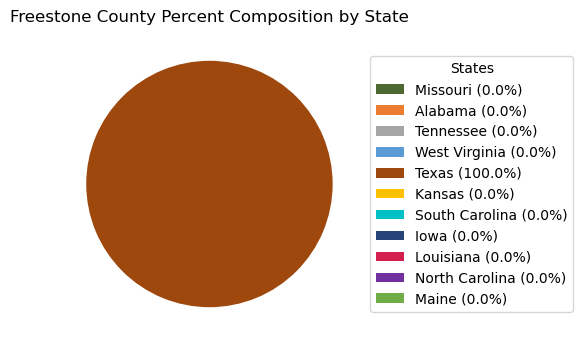

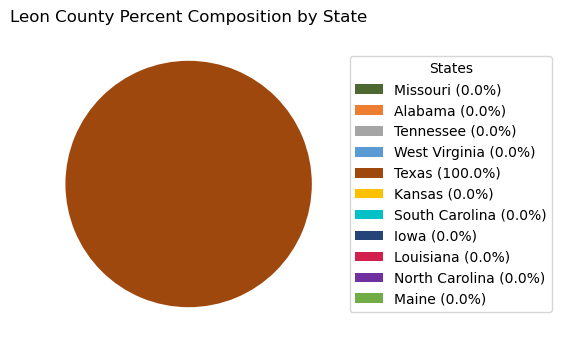

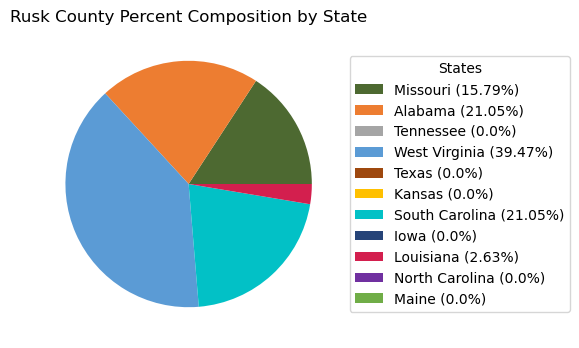

In [11]:
#now call up the pie_county function to make a plot for each county

county_pies = tdem.pie_county(every_county, "Trap State", "Percent Contribution", "County")

## Conclusions

Texas represents the largest source for super-stocked birds (61.1%) while Maine represents the smallest source, contributing less than 0.23% to the initial release population. Because the initial composition of birds by source state differs across super-stocked counties, counties will have likely experienced varying levels of translocation success. I look forward to comparing the composition of the release population with the contemporary population to determine which source state contributed the most up to this point. 

I would say this final project was very successful and I was able to accomplish all three objectives. The challenges this project created taught me a lot and I grew even more familiar with my dataset. The accomplished objectives served as a jumping off point to even more questions I would like to pursue. In the future, I plan to use python to generate a series of choropleth maps to display the contribution of each source state to the release population. 



## References

"Pandas apply() - Apply a Function along an Axis of the DataFrame." DataCamp, www.datacamp.com/tutorial/pandas-apply.

"Python Pandas: Find Unique Values from a Single Column." Tutorialspoint, www.tutorialspoint.com/python-pandas-find-unique-values-from-a-single-column.

"Matplotlib Examples - Gallery." Matplotlib, matplotlib.org/stable/gallery/index.html.

Namipara, K. V. "A Better Visualisation of Pie Charts by Matplotlib." Medium, medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f.